73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


C:\Users\micha\AppData\Local\Temp\ipykernel_6720\305019128.py:66: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:
C:\Users\micha\AppData\Local\Temp\ipykernel_6720\305019128.py:66: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:
C:\Users\micha\AppData\Local\Temp\ipykernel_6720\305019128.py:66: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:
C:\Users\micha\AppData\Local\Temp\ipykernel_6720\305019128.py:66: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[

[1 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



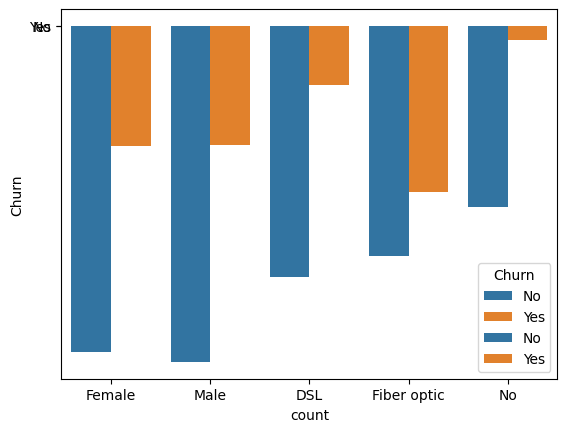

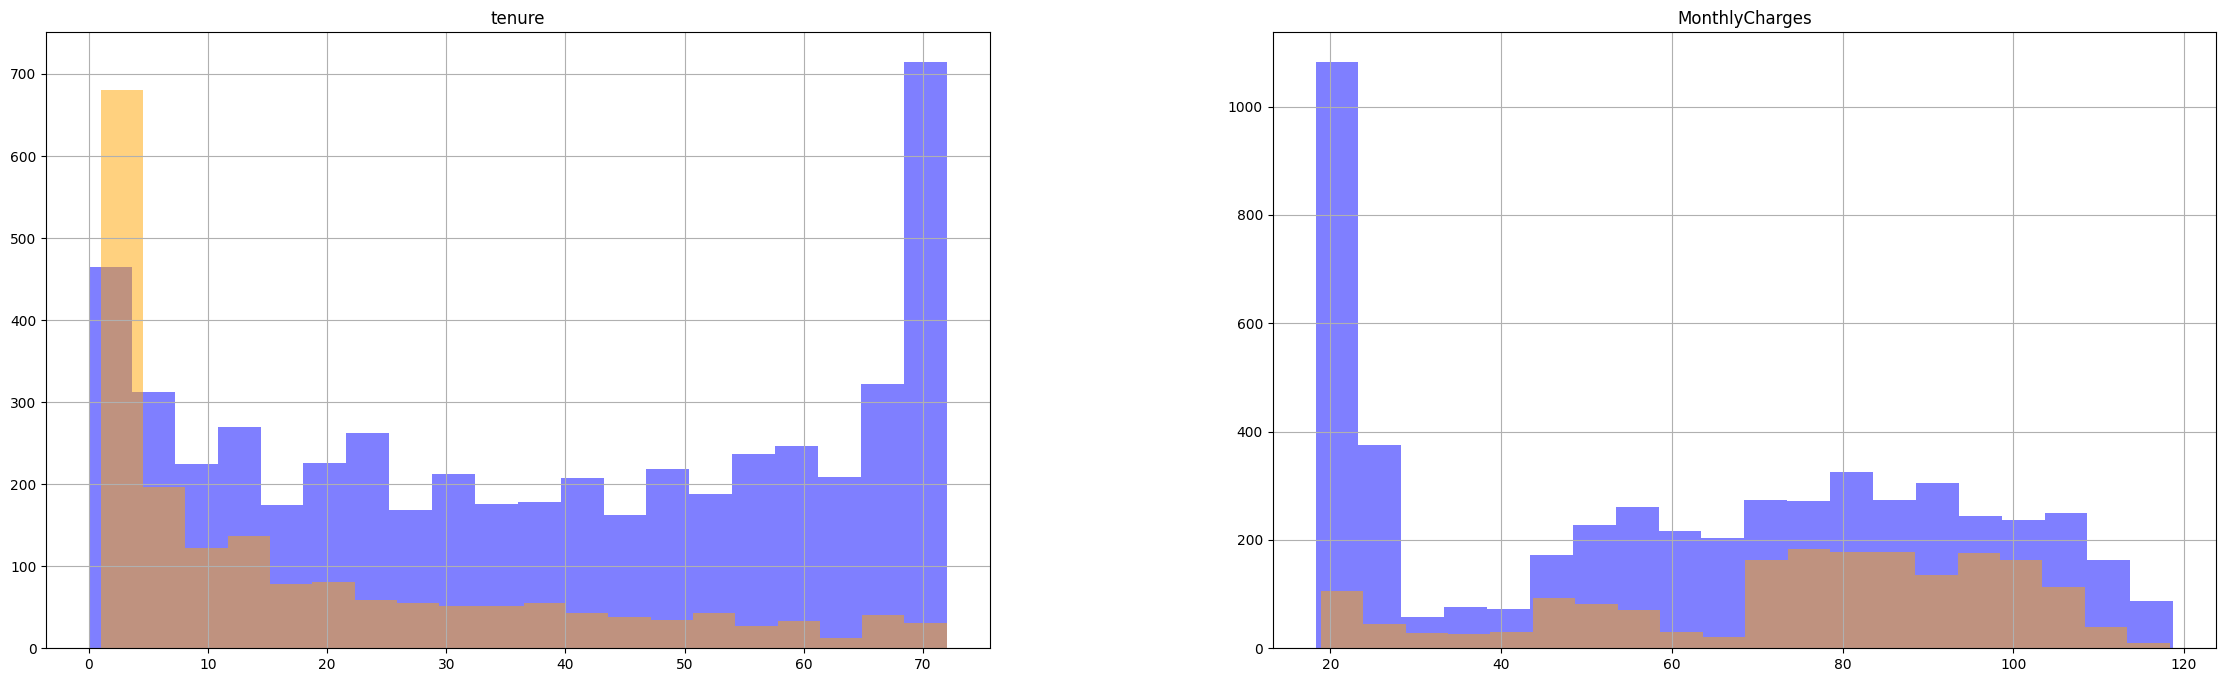

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Let’s read and look at the data
df = pd.read_csv("D:\Downloads feom c\Downloads\churn.csv")
df

#To show the number of rows and columns
df.shape

#To see all column names
df.columns.values

#To check for NA or missing values
df.isna().sum()

#To Show Some Statistics
df.describe()


#To get customer churn count
df['Churn'].value_counts()

#To Visualize the count of customer churn
sns.countplot(df['Churn'])

#To see the percentage of customers that are leaving
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# print the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

#Visualize the churn count for both males and females
sns.countplot(x ='gender', hue='Churn', data=df)

#Visualize the churn count for the internet service
sns.countplot(x='InternetService', hue='Churn', data=df)





#To Visualize Numeric data
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

#To remove unnecessary columns
cleanDF = df.drop('customerID', axis=1)

#Convert all the non-numeric columns to numeric
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

#To show the data types
cleanDF.dtypes

#To show first 5 rows of the new data
#Scale the data
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

#Split the data into 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

#Create and Train the model
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

#Create the predictions on the test data
predictions = model.predict(xtest)
# print the predictions
print(predictions)

#And Finally check the precision, recall and f1-score
print(classification_report(ytest, predictions))






